In [1]:
import os
import pandas as pd
import numpy as np
import pylab as py
import warnings
import matplotlib.pyplot as plt
from  matplotlib import rc
from matplotlib.colors import LogNorm
from matplotlib import font_manager
import matplotlib
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text',usetex=True)
from scipy.interpolate import interp1d
from scipy.interpolate import make_interp_spline as spline
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
from matplotlib.ticker import ScalarFormatter,MaxNLocator,LogLocator,NullFormatter,FuncFormatter
warnings.filterwarnings('ignore')
import matplotlib.font_manager
from matplotlib.ticker import MultipleLocator, FormatStrFormatter,AutoMinorLocator
from matplotlib.pyplot import gca

In [2]:
from matplotlib import ticker, cm
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap

In [3]:
import plotly.graph_objects as go


In [4]:
pwd = os.getcwd()
#pwd = pwd + '/Nuclear-TMDs/plots'
path2dat = pwd + '/contour/example'
datalst = os.listdir(path2dat)

In [5]:
newdatalst = []
for address in datalst:
    if("PDF_" in address):
        print(address)
        newdatalst.append(address)

PDF_Au_Q0.csv
PDF_p_Q0.csv
PDF_NLO.o
PDF_NLO.f
PDF_Au_MZ.csv
PDF_Au_10.csv
PDF_p_10.csv


In [6]:
p_df = pd.read_csv(path2dat + '/PDF_p_Q0.csv', delimiter = ',',delim_whitespace=True)
p_10_df = pd.read_csv(path2dat + '/PDF_p_10.csv', delimiter = ',',delim_whitespace=True)
Au_Q0_df = pd.read_csv(path2dat + '/PDF_Au_Q0.csv', delimiter = ',',delim_whitespace=True)
Au_10_df = pd.read_csv(path2dat + '/PDF_Au_10.csv', delimiter = ',',delim_whitespace=True)
Au_MZ_df = pd.read_csv(path2dat + '/PDF_Au_MZ.csv', delimiter = ',',delim_whitespace=True)

In [7]:
p_df[189:190]["up"]    = np.float(p_df[188:189]["up"]) 
p_10_df[189:190]["up"] = np.float(p_10_df[188:189]["up"]) 
Au_Q0_df[189:190]["u"] = np.float(Au_Q0_df[188:189]["u"]) 
Au_10_df[189:190]["u"] = np.float(Au_10_df[188:189]["u"]) 
Au_MZ_df[189:190]["u"] = np.float(Au_MZ_df[188:189]["u"]) 

p_df[189:190]["dp"]    = np.float(p_df[188:189]["dp"]) 
p_10_df[189:190]["dp"] = np.float(p_10_df[188:189]["dp"]) 
Au_Q0_df[189:190]["d"] = np.float(Au_Q0_df[188:189]["d"]) 
Au_10_df[189:190]["d"] = np.float(Au_10_df[188:189]["d"]) 
Au_MZ_df[189:190]["d"] = np.float(Au_MZ_df[188:189]["d"]) 

In [8]:
x01_low = pd.read_csv(path2dat + '/x01_LOW.csv', delimiter = ',',delim_whitespace=True)
x01_high = pd.read_csv(path2dat + '/x01_HIGH.csv', delimiter = ',',delim_whitespace=True)
x02_low = pd.read_csv(path2dat + '/x02_LOW.csv', delimiter = ',',delim_whitespace=True)
x02_high = pd.read_csv(path2dat + '/x02_HIGH.csv', delimiter = ',',delim_whitespace=True)
x03_low = pd.read_csv(path2dat + '/x03_LOW.csv', delimiter = ',',delim_whitespace=True)
x03_high = pd.read_csv(path2dat + '/x03_HIGH.csv', delimiter = ',',delim_whitespace=True)
x04_low = pd.read_csv(path2dat + '/x04_LOW.csv', delimiter = ',',delim_whitespace=True)
x04_high = pd.read_csv(path2dat + '/x04_HIGH.csv', delimiter = ',',delim_whitespace=True)

In [59]:
p_10_df.drop('dp', inplace=True, axis=1)

In [64]:
p_10_df.to_csv('try3.csv',index = False)

In [62]:
Au_10_df.drop('d', inplace=True, axis=1)

In [65]:
Au_10_df.to_csv('try4.csv', index = False)

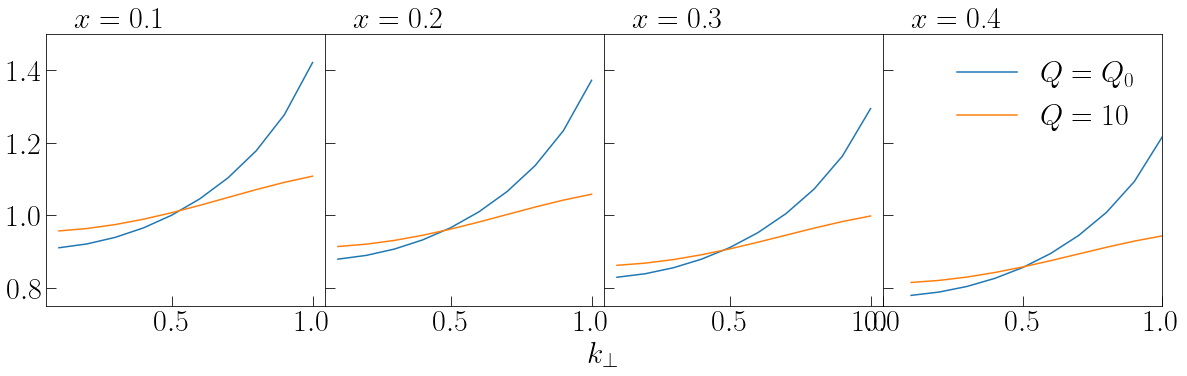

In [8]:
fig, axs = plt.subplots(1, 4, sharex=False, sharey='row',gridspec_kw={'hspace': 0.3, 'wspace': 0}) 


sizeOfFont = 30

axs[0].plot(x01_low["kt"], x01_low["u1"]/x01_low["up"] )
axs[1].plot(x02_low["kt"], x02_low["u1"]/x02_low["up"] )
axs[2].plot(x03_low["kt"], x03_low["u1"]/x03_low["up"] )
axs[3].plot(x04_low["kt"], x04_low["u1"]/x04_low["up"], label = r"\rm $Q=Q_0$" )

axs[0].plot(x01_high["kt"], x01_high["u1"]/x01_high["up"] )
axs[1].plot(x02_high["kt"], x02_high["u1"]/x02_high["up"] )
axs[2].plot(x03_high["kt"], x03_high["u1"]/x03_high["up"] )
axs[3].plot(x04_high["kt"], x04_high["u1"]/x04_high["up"], label = r"\rm $Q=10$" )

axs[3].plot(p_10_df[4900:5000]["ky"],Au_Q0_df[4900:5000]["u"]/p_df[4900:5000]["up"], color = "black", linestyle="dashed")



axs[0].set_ylim(0.75,1.5)

axs[0].tick_params(axis="both",direction="in", length=10,labelsize = sizeOfFont)
axs[1].tick_params(axis="both",direction="in", length=10,labelsize = sizeOfFont)
axs[2].tick_params(axis="both",direction="in", length=10,labelsize = sizeOfFont)
axs[3].tick_params(axis="both",direction="in", length=10,labelsize = sizeOfFont)

axs[3].legend(frameon = False,fontsize = sizeOfFont,loc=1,ncol = 1,columnspacing = 0.5)

axs[3].set_xlim(0,1)


axs[2].set_xlabel(r"\rm $k_{\perp} $ " , fontsize = sizeOfFont, x= 0.)

props = dict(boxstyle='round', facecolor='white', alpha=0)


axs[0].text(0.1, 1.10,  r"\rm $ x = $ 0.1", transform=axs[0].transAxes, fontsize=sizeOfFont,
    verticalalignment='top', bbox=props)


axs[1].text(0.1, 1.10,  r"\rm $ x = $ 0.2", transform=axs[1].transAxes, fontsize=sizeOfFont,
    verticalalignment='top', bbox=props)


axs[2].text(0.1, 1.10,  r"\rm $ x = $ 0.3", transform=axs[2].transAxes, fontsize=sizeOfFont,
    verticalalignment='top', bbox=props)


axs[3].text(0.1, 1.10,  r"\rm $ x = $ 0.4", transform=axs[3].transAxes, fontsize=sizeOfFont,
    verticalalignment='top', bbox=props)


fig.set_size_inches(20,5)

fig.savefig('xQ.pdf', bbox_inches = "tight")



In [9]:
A = 197
Z = 79
N = A - Z

In [11]:
Z/A

0.4010152284263959

In [12]:
N/A

0.5989847715736041

In [38]:
class nlcmap(LinearSegmentedColormap):
    """A nonlinear colormap"""

    name = 'nlcmap'

    def __init__(self, cmap, levels):
        self.cmap = cmap
        self.monochrome = self.cmap.monochrome
        self.levels = np.asarray(levels, dtype='float64')
        self._x = self.levels/ self.levels.max()
        self.levmax = self.levels.max()
        self.levmin = self.levels.min()
        self._y = np.linspace(self.levmin, self.levmax, len(self.levels))

    def __call__(self, xi, alpha=1.0, **kw):
        yi = np.interp(xi, self._x, self._y)
        return self.cmap(yi/self.levmax, alpha)

In [141]:
levels = [0,0.1,0.4,0.5,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0,2.4,2.8,3.2,3.6,4.0,4.4,4.8,5.2,5.6]
levels2 = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.6,2.0,2.4,2.8,3.2,3.6]

In [142]:
cmap_lin = cm.viridis
cmap_nonlin = nlcmap(cmap_lin, levels)
cmap_nonlin2 = nlcmap(cmap_lin, levels2)

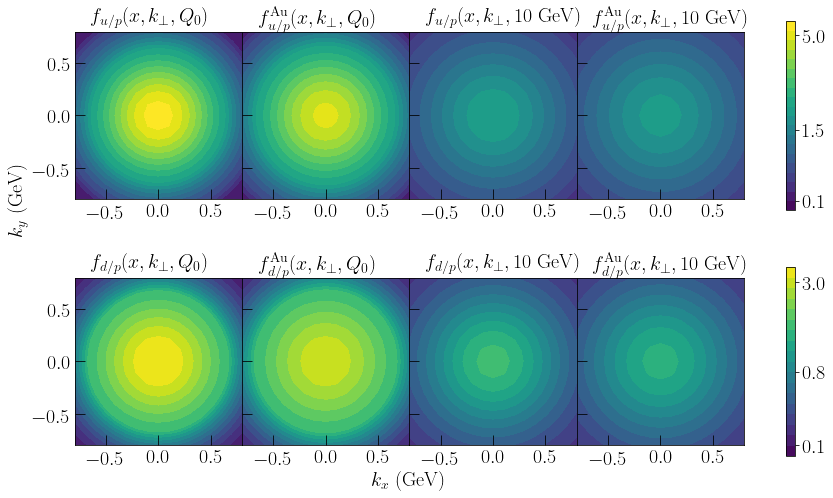

In [146]:
fig, axs = plt.subplots(2, 4, sharex=False, sharey='row',gridspec_kw={'hspace': 0.3, 'wspace': 0}) 

sizeOfFont = 20

### p 
kx = p_df["ky"][0:20]
ky = p_df["ky"][0:20]
xx, yy = np.meshgrid(kx,ky, sparse = True)
z = []
for i in range(len(kx)):
    start = i*20
    end = i*20+20
    z.append(np.abs(np.array(p_df[start:end]["up"]) ))
cf0 = axs[0,0].contourf(kx,ky,z, levels = levels, vmin =0, vmax = 5.3, cmap = cmap_nonlin)



### Au
kx = Au_Q0_df["ky"][0:20]
ky = Au_Q0_df["ky"][0:20]
xx, yy = np.meshgrid(kx,ky, sparse = True)
z = []
for i in range(len(kx)):
    start = i*20
    end = i*20+20
    z.append(np.abs(np.array(Au_Q0_df[start:end]["u"]) ))
cf1 = axs[0,1].contourf(kx,ky,z,  levels = levels, vmin =0, vmax = 5.3, cmap = cmap_nonlin)



### p
kx = p_10_df["ky"][0:20]
ky = p_10_df["ky"][0:20]
xx, yy = np.meshgrid(kx,ky, sparse = True)
z = []
for i in range(len(kx)):
    start = i*20
    end = i*20+20
    z.append(np.abs(np.array(p_10_df[start:end]["up"]) ))
cf2 =axs[0,2].contourf(kx,ky,z,  levels = levels, vmin =0, vmax = 5.3, cmap = cmap_nonlin)


### Au
kx = Au_10_df["ky"][0:20]
ky = Au_10_df["ky"][0:20]
xx, yy = np.meshgrid(kx,ky, sparse = True)
z = []
for i in range(len(kx)):
    start = i*20
    end = i*20+20
    z.append(np.abs(np.array(Au_10_df[start:end]["u"]) ))
cf2 =axs[0,3].contourf(kx,ky,z, levels = levels, vmin =0, vmax = 5.3, cmap = cmap_nonlin)


### p 
kx = p_df["ky"][0:20]
ky = p_df["ky"][0:20]
xx, yy = np.meshgrid(kx,ky, sparse = True)
z = []
for i in range(len(kx)):
    start = i*20
    end = i*20+20
    z.append(np.abs(np.array(p_df[start:end]["dp"]) ))
cf10 = axs[1,0].contourf(kx,ky,z, levels = levels2, vmin =0, vmax = 3.6,  cmap = cmap_nonlin2)



### Au
kx = Au_Q0_df["ky"][0:20]
ky = Au_Q0_df["ky"][0:20]
xx, yy = np.meshgrid(kx,ky, sparse = True)
z = []
for i in range(len(kx)):
    start = i*20
    end = i*20+20
    z.append(np.abs(np.array(Au_Q0_df[start:end]["d"]) ))
cf11 = axs[1,1].contourf(kx,ky,z, levels = levels2, vmin =0, vmax = 3.6,  cmap = cmap_nonlin2)



### p
kx = p_10_df["ky"][0:20]
ky = p_10_df["ky"][0:20]
xx, yy = np.meshgrid(kx,ky, sparse = True)
z = []
for i in range(len(kx)):
    start = i*20
    end = i*20+20
    z.append(np.abs(np.array(p_10_df[start:end]["dp"]) ))
cf2 =axs[1,2].contourf(kx,ky,z, levels = levels2, vmin = 0, vmax = 3.6,  cmap = cmap_nonlin2)


### Au
kx = Au_10_df["ky"][0:20]
ky = Au_10_df["ky"][0:20]
xx, yy = np.meshgrid(kx,ky, sparse = True)
z = []
for i in range(len(kx)):
    start = i*20
    end = i*20+20
    z.append(np.abs(np.array(Au_10_df[start:end]["d"]) ))
cf2 =axs[1,3].contourf(kx,ky,z, levels = levels2, vmin = 0, vmax = 3.6,  cmap = cmap_nonlin2)





axs[0,0].tick_params(axis="both",direction="in", length=10,labelsize = sizeOfFont)
axs[0,1].tick_params(axis="both",direction="in", length=10,labelsize = sizeOfFont)
axs[0,2].tick_params(axis="both",direction="in", length=10,labelsize = sizeOfFont)
axs[0,3].tick_params(axis="both",direction="in", length=10,labelsize = sizeOfFont)

axs[1,0].tick_params(axis="both",direction="in", length=10,labelsize = sizeOfFont)
axs[1,1].tick_params(axis="both",direction="in", length=10,labelsize = sizeOfFont)
axs[1,2].tick_params(axis="both",direction="in", length=10,labelsize = sizeOfFont)
axs[1,3].tick_params(axis="both",direction="in", length=10,labelsize = sizeOfFont)



#axs[0].set_xticks([0.2,0.4,0.6,0.8])
#axs[0].set_yticks([0.2,0.4,0.6,0.8])


axs[1,2].set_xlabel(r"\rm $k_x$ (GeV)", fontsize = sizeOfFont, x = 0.)
axs[0,0].set_ylabel(r"\rm $k_y$ (GeV)", fontsize = sizeOfFont, y = 0.)
#axs[0].set_xlabel(r"\rm $k_x$", fontsize = sizeOfFont)
#axs[1].set_xlabel(r"\rm $k_x$ (GeV)", fontsize = sizeOfFont)
#axs[2].set_xlabel(r"\rm $k_x$", fontsize = sizeOfFont)
#axs[3].set_xlabel(r"\rm $k_x$", fontsize = sizeOfFont)


#axs[0].set_ylim(-0.7,0.7)
#axs[0].set_xlim(-0.7,0.7)
#axs[1].set_xlim(-0.7,0.7)
#axs[2].set_xlim(-0.7,0.7)
#axs[3].set_xlim(-0.7,0.7)



axs[0,0].set_yticks([-0.5,0.0,0.5])
axs[0,0].set_xticks([-0.5,0.0,0.5])
axs[0,1].set_xticks([-0.5,0.0,0.5])
axs[0,2].set_xticks([-0.5,0.0,0.5])
axs[0,3].set_xticks([-0.5,0.0,0.5])




axs[1,0].set_yticks([-0.5,0.0,0.5])
axs[1,0].set_xticks([-0.5,0.0,0.5])
axs[1,1].set_xticks([-0.5,0.0,0.5])
axs[1,2].set_xticks([-0.5,0.0,0.5])
axs[1,3].set_xticks([-0.5,0.0,0.5])


axs[0,0].set_xlim(-0.8,0.8)
axs[0,1].set_xlim(-0.8,0.8)
axs[0,2].set_xlim(-0.8,0.8)
axs[0,3].set_xlim(-0.8,0.8)
axs[1,0].set_xlim(-0.8,0.8)
axs[1,1].set_xlim(-0.8,0.8)
axs[1,2].set_xlim(-0.8,0.8)
axs[1,3].set_xlim(-0.8,0.8)


axs[0,0].set_ylim(-0.8,0.8)
axs[0,1].set_ylim(-0.8,0.8)
axs[0,2].set_ylim(-0.8,0.8)
axs[0,3].set_ylim(-0.8,0.8)
axs[1,0].set_ylim(-0.8,0.8)
axs[1,1].set_ylim(-0.8,0.8)
axs[1,2].set_ylim(-0.8,0.8)
axs[1,3].set_ylim(-0.8,0.8)



        
props = dict(boxstyle='round', facecolor='white', alpha=0)

axs[0,0].text(0.1, 1.15 ,  r"\rm $f_{u/p}(x,k_{\perp}, Q_0)$ ", transform=axs[0,0].transAxes, fontsize=sizeOfFont,
verticalalignment='top', bbox=props)

axs[0,1].text(0.1, 1.15,  r"\rm $f_{u/p}^{\rm Au}(x,k_{\perp}, Q_0)$ ", transform=axs[0,1].transAxes, fontsize=sizeOfFont,
verticalalignment='top', bbox=props)

axs[0,2].text(0.1, 1.15,  r"\rm $f_{u/p}(x,k_{\perp}, 10 $ GeV$)$", transform=axs[0,2].transAxes, fontsize=sizeOfFont,
verticalalignment='top', bbox=props)

axs[0,3].text(0.1, 1.15,  r"\rm $f_{u/p}^{\rm Au}(x,k_{\perp}, 10 $ GeV$)$", transform=axs[0,3].transAxes, fontsize=sizeOfFont,
verticalalignment='top', bbox=props)

axs[1,0].text(0.1, 1.15 ,  r"\rm $f_{d/p}(x,k_{\perp}, Q_0)$ ", transform=axs[1,0].transAxes, fontsize=sizeOfFont,
verticalalignment='top', bbox=props)

axs[1,1].text(0.1, 1.15,  r"\rm $f_{d/p}^{\rm Au}(x,k_{\perp}, Q_0)$ ", transform=axs[1,1].transAxes, fontsize=sizeOfFont,
verticalalignment='top', bbox=props)

axs[1,2].text(0.1, 1.15,  r"\rm $f_{d/p}(x,k_{\perp}, 10 $ GeV$)$", transform=axs[1,2].transAxes, fontsize=sizeOfFont,
verticalalignment='top', bbox=props)

axs[1,3].text(0.1, 1.15,  r"\rm $f_{d/p}^{\rm Au}(x,k_{\perp}, 10 $ GeV$)$", transform=axs[1,3].transAxes, fontsize=sizeOfFont,
verticalalignment='top', bbox=props)


fig.set_size_inches(15,8)
axs[0,0].set_aspect('equal')
axs[0,1].set_aspect('equal')
axs[0,2].set_aspect('equal')
axs[0,3].set_aspect('equal')

axs[1,0].set_aspect('equal')
axs[1,1].set_aspect('equal')
axs[1,2].set_aspect('equal')
axs[1,3].set_aspect('equal')


cb = fig.colorbar(cf0, ax=axs[0],  ticks = [0.1,1.5,5.0]) 
for t in cb.ax.get_yticklabels():
     t.set_fontsize(sizeOfFont)

cb = fig.colorbar(cf10, ax=axs[1],  ticks = [0.1,0.8,3.0]) 
for t in cb.ax.get_yticklabels():
     t.set_fontsize(sizeOfFont)


fig.savefig('contour_equal.pdf', bbox_inches = "tight")


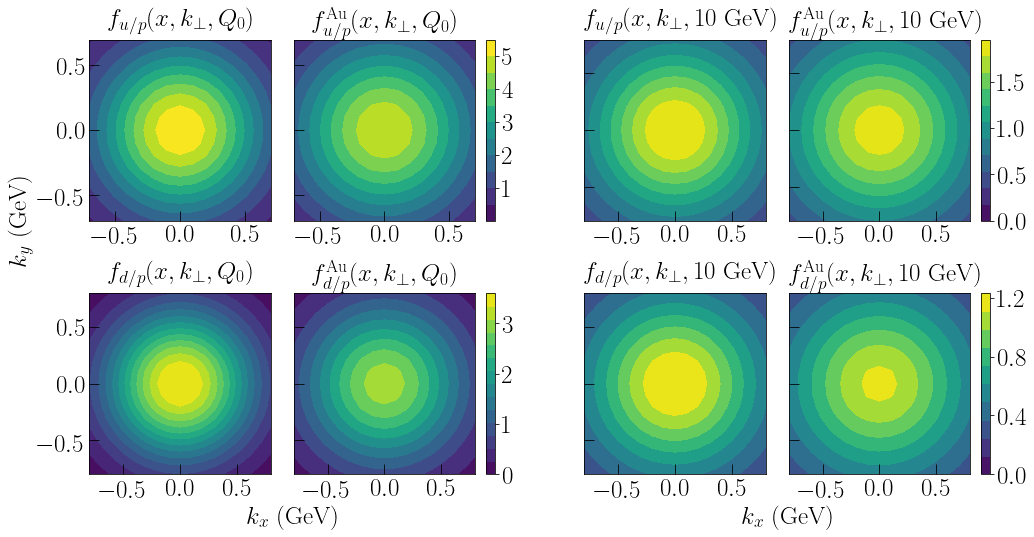

In [37]:
fig = plt.figure()

gs = gridspec.GridSpec(2, 4, figure = fig, hspace = 0.4, wspace =0.20)

gs00 = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs[0:2], wspace=0)

axs0 = plt.subplot(gs00[0])
axs1 = plt.subplot(gs00[1])

gs10 = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs[2:4], wspace=0)

axs2 = plt.subplot(gs10[0])
axs3 = plt.subplot(gs10[1])

gs11 = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs[4:6], wspace=0)

axs10 = plt.subplot(gs11[0])
axs11 = plt.subplot(gs11[1])

gs12 = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs[6:8], wspace=0)

axs12 = plt.subplot(gs12[0])
axs13 = plt.subplot(gs12[1])


sizeOfFont = 25

### p 
kx = p_df["ky"][0:20]
ky = p_df["ky"][0:20]
xx, yy = np.meshgrid(kx,ky, sparse = True)
z = []
for i in range(len(kx)):
    start = i*20
    end = i*20+20
    z.append(np.abs(np.array(p_df[start:end]["up"]) ))
cf0 = axs0.contourf(kx,ky,z,levels = np.linspace(0,5.5,12,endpoint = True), vmin =0, vmax = 5.3)



### Au
kx = Au_Q0_df["ky"][0:20]
ky = Au_Q0_df["ky"][0:20]
xx, yy = np.meshgrid(kx,ky, sparse = True)
z = []
for i in range(len(kx)):
    start = i*20
    end = i*20+20
    z.append(np.abs(np.array(Au_Q0_df[start:end]["u"]) ))
cf1 = axs1.contourf(kx,ky,z, levels = np.linspace(0,5.5,12,endpoint = True), vmin = 0, vmax =5.3)



### p 
kx = p_10_df["ky"][0:20]
ky = p_10_df["ky"][0:20]
xx, yy = np.meshgrid(kx,ky, sparse = True)
z = []
for i in range(len(kx)):
    start = i*20
    end = i*20+20
    z.append(np.abs(np.array(p_10_df[start:end]["up"]) ))
cf2 = axs2.contourf(kx,ky,z,  levels = np.linspace(0,1.96,12,endpoint = True), vmin =0, vmax = 1.95)

### Au
kx = Au_10_df["ky"][0:20]
ky = Au_10_df["ky"][0:20]
xx, yy = np.meshgrid(kx,ky, sparse = True)
z = []
for i in range(len(kx)):
    start = i*20
    end = i*20+20
    z.append(np.abs(np.array(Au_10_df[start:end]["u"]) ))
cf3 = axs3.contourf(kx,ky,z,  levels = np.linspace(0,1.96,12,endpoint = True), vmin =0, vmax = 1.95)



### p 
kx = p_df["ky"][0:20]
ky = p_df["ky"][0:20]
xx, yy = np.meshgrid(kx,ky, sparse = True)
z = []
for i in range(len(kx)):
    start = i*20
    end = i*20+20
    z.append(np.abs(np.array(p_df[start:end]["dp"]) ))
cf10 = axs10.contourf(kx,ky,z, np.linspace(0,3.6,15,endpoint = True),vmin =0, vmax = 3.6)



### Au
kx = Au_Q0_df["ky"][0:20]
ky = Au_Q0_df["ky"][0:20]
xx, yy = np.meshgrid(kx,ky, sparse = True)
z = []
for i in range(len(kx)):
    start = i*20
    end = i*20+20
    z.append(np.abs(np.array(Au_Q0_df[start:end]["d"]) ))
cf11 = axs11.contourf(kx,ky,z, np.linspace(0,3.6,12,endpoint = True), vmin =0, vmax = 3.6)



### p 
kx = p_10_df["ky"][0:20]
ky = p_10_df["ky"][0:20]
xx, yy = np.meshgrid(kx,ky, sparse = True)
z = []
for i in range(len(kx)):
    start = i*20
    end = i*20+20
    z.append(np.abs(np.array(p_10_df[start:end]["dp"]) ))
cf12 = axs12.contourf(kx,ky,z, np.linspace(0,1.23,11,endpoint = True), vmin = 0, vmax = 1.21)


### Au
kx = Au_10_df["ky"][0:20]
ky = Au_10_df["ky"][0:20]
xx, yy = np.meshgrid(kx,ky, sparse = True)
z = []
for i in range(len(kx)):
    start = i*20
    end = i*20+20
    z.append(np.abs(np.array(Au_10_df[start:end]["d"]) ))
cf13 = axs13.contourf(kx,ky,z,  np.linspace(0,1.23,11,endpoint = True), vmin =0, vmax = 1.21)





axs0.set_aspect('equal')
axs1.set_aspect('equal')
axs2.set_aspect('equal')
axs3.set_aspect('equal')

axs10.set_aspect('equal')
axs11.set_aspect('equal')
axs12.set_aspect('equal')
axs13.set_aspect('equal')


axs0.tick_params(axis="both",direction="in", length=10,labelsize = sizeOfFont)
axs1.tick_params(axis="both",direction="in", length=10,labelsize = sizeOfFont)
axs2.tick_params(axis="both",direction="in", length=10,labelsize = sizeOfFont)
axs3.tick_params(axis="both",direction="in", length=10,labelsize = sizeOfFont)


axs10.tick_params(axis="both",direction="in", length=10,labelsize = sizeOfFont)
axs11.tick_params(axis="both",direction="in", length=10,labelsize = sizeOfFont)
axs12.tick_params(axis="both",direction="in", length=10,labelsize = sizeOfFont)
axs13.tick_params(axis="both",direction="in", length=10,labelsize = sizeOfFont)

axs0.set_ylabel(r"\rm $k_y$ (GeV)", fontsize = sizeOfFont,y=0.)
axs11.set_xlabel(r"\rm $k_x$ (GeV)", fontsize = sizeOfFont,x=0.)
axs13.set_xlabel(r"\rm $k_x$ (GeV)", fontsize = sizeOfFont,x=0.)



cb = fig.colorbar(cf0, ax=axs1,  ticks = [1.0,2.0,3.0,4.0,5.0]) 
for t in cb.ax.get_yticklabels():
     t.set_fontsize(sizeOfFont)

        
        
cb = fig.colorbar(cf2, ax=axs3, ticks = [0,0.5,1.0,1.5] ) 
for t in cb.ax.get_yticklabels():
     t.set_fontsize(sizeOfFont)
        
        
cb = fig.colorbar(cf10, ax=axs11,  ticks = [0,1,2,3] )
for t in cb.ax.get_yticklabels():
     t.set_fontsize(sizeOfFont)

        
cb = fig.colorbar(cf12, ax=axs13, ticks = [0,0.4,0.8,1.2] )
for t in cb.ax.get_yticklabels():
     t.set_fontsize(sizeOfFont)
        

axs0.set_yticks([-0.5,0.0,0.5])
axs1.set_yticks([-0.5,0.0,0.5])

axs0.set_xticks([-0.5,0.0,0.5])
axs1.set_xticks([-0.5,0.0,0.5])
axs2.set_xticks([-0.5,0.0,0.5])
axs3.set_xticks([-0.5,0.0,0.5])

axs0.set_yticks([-0.5,0.0,0.5])
axs1.set_yticks([-0.5,0.0,0.5])

axs1.set_xticks([-0.5,0.0,0.5])
axs2.set_xticks([-0.5,0.0,0.5])
axs3.set_xticks([-0.5,0.0,0.5])

axs10.set_yticks([-0.5,0.0,0.5])
axs11.set_yticks([-0.5,0.0,0.5])
axs12.set_yticks([-0.5,0.0,0.5])
axs13.set_yticks([-0.5,0.0,0.5])

axs10.set_xticks([-0.5,0.0,0.5])
axs11.set_xticks([-0.5,0.0,0.5])
axs12.set_xticks([-0.5,0.0,0.5])
axs13.set_xticks([-0.5,0.0,0.5])

axs1.set_yticklabels([])
axs2.set_yticklabels([])
axs3.set_yticklabels([])


axs11.set_yticklabels([])
axs12.set_yticklabels([])
axs13.set_yticklabels([])

axs0.text(0.1, 1.18 ,  r"\rm $f_{u/p}(x,k_{\perp}, Q_0)$ ", transform=axs0.transAxes, fontsize=sizeOfFont,
verticalalignment='top', bbox=props)

axs1.text(0.1, 1.18,  r"\rm $f_{u/p}^{\rm Au}(x,k_{\perp}, Q_0)$ ", transform=axs1.transAxes, fontsize=sizeOfFont,
verticalalignment='top', bbox=props)


axs2.text(0., 1.18,  r"\rm $f_{u/p}(x,k_{\perp}, 10 $ GeV$)$", transform=axs2.transAxes, fontsize=sizeOfFont,
verticalalignment='top', bbox=props)

axs3.text(0., 1.18,  r"\rm $f_{u/p}^{\rm Au}(x,k_{\perp}, 10 $ GeV$)$", transform=axs3.transAxes, fontsize=sizeOfFont,
verticalalignment='top', bbox=props)


axs10.text(0.1, 1.18 ,  r"\rm $f_{d/p}(x,k_{\perp}, Q_0)$ ", transform=axs10.transAxes, fontsize=sizeOfFont,
verticalalignment='top', bbox=props)

axs11.text(0.1, 1.18,  r"\rm $f_{d/p}^{\rm Au}(x,k_{\perp}, Q_0)$ ", transform=axs11.transAxes, fontsize=sizeOfFont,
verticalalignment='top', bbox=props)


axs12.text(0, 1.18,  r"\rm $f_{d/p}(x,k_{\perp}, 10 $ GeV$)$", transform=axs12.transAxes, fontsize=sizeOfFont,
verticalalignment='top', bbox=props)

axs13.text(0., 1.18,  r"\rm $f_{d/p}^{\rm Au}(x,k_{\perp}, 10 $ GeV$)$", transform=axs13.transAxes, fontsize=sizeOfFont,
verticalalignment='top', bbox=props)


axs0.set_xlim(-0.7,0.7)
axs0.set_ylim(-0.7,0.7)

axs1.set_xlim(-0.7,0.7)
axs1.set_ylim(-0.7,0.7)


axs2.set_xlim(-0.8,0.8)
axs2.set_ylim(-0.8,0.8)

axs3.set_xlim(-0.8,0.8)
axs3.set_ylim(-0.8,0.8)


axs10.set_xlim(-0.8,0.8)
axs10.set_ylim(-0.8,0.8)

axs11.set_xlim(-0.8,0.8)
axs11.set_ylim(-0.8,0.8)

axs12.set_xlim(-0.8,0.8)
axs12.set_ylim(-0.8,0.8)

axs13.set_xlim(-0.8,0.8)
axs13.set_ylim(-0.8,0.8)


fig.set_size_inches(17,8)

fig.savefig('contour.pdf', bbox_inches = "tight")